#Question1:
Bootstrapping is a powerful statistical method that allows us to estimate the sampling distribution of a statistic by resampling the data. We randomly select samples with replacement, calculate the statistic for each resample, and repeat this process thousands of times. The result is an empirical distribution that gives us insights into the variability and accuracy of our statistic. It's particularly useful when the data doesn't meet the assumptions of traditional parametric tests or when we have a small sample size. Bootstrapping is a way to make the best of what we've got and build confidence in our estimates.

What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? 

The standard error of the mean and the standard deviation are both measures of variability, but they capture different aspects of the data.
The standard deviation of the original data is a measure of the spread or dispersion of the data points around the mean. It tells us how much the individual data points deviate from the average value. A smaller standard deviation indicates that the data points are generally close to the mean, while a larger standard deviation indicates that the data points are more spread out.
On the other hand, the standard error of the mean is a measure of the variability of the sample mean as an estimate of the population mean. It takes into account both the standard deviation of the original data and the sample size. The standard error decreases as the sample size increases, reflecting that larger samples provide more precise estimates of the population mean. It's essentially the standard deviation of the sampling distribution of the mean.

summary of chatbox and I interactions:

Bootstrapping: We discussed that bootstrapping is a statistical method where you resample from the original dataset (with replacement) to estimate statistics like the mean or standard error. It's useful when new data collection isn't possible and helps build a distribution of the statistic for making inferences.

Difference Between Bootstrapping and Original Sampling: We compared bootstrapping with taking new, independent samples from the population. While bootstrapping is practical when new data is unavailable, sampling directly from the population multiple times provides more accurate estimates of the population mean since it reduces bias and variability.

Standard Error of the Mean vs. Standard Deviation: We differentiated between the standard error of the mean (SEM) and standard deviation (SD). SD measures the spread of individual data points within a dataset, while SEM measures how much the sample mean is expected to vary from the true population mean. SEM decreases as sample size increases, improving the precision of the mean estimate, whereas SD reflects the inherent variability in the data itself.

First Question chatbox interaction link: https://chatgpt.com/share/66fdff50-360c-800d-bcbc-917018a018c2

#Question2:
Creating a 95% confidence interval using the standard error of the mean involves a few straightforward steps. First, compute the sample mean to get our central point. Then, determine the standard error of the mean by dividing the standard deviation of our data by the square root of the sample size. This step helps us understand the average amount of variation we'd expect in the sample means if we took multiple samples.

To find the range of our confidence interval, we multiply the standard error by 1.96 (the critical value from the normal distribution for a 95% interval) to establish our margin of error. This margin of error represents the amount we need to add and subtract from our sample mean to create the bounds of our interval.

Finally, by adding the margin of error to the sample mean and then subtracting it, we define the lower and upper bounds of our 95% confidence interval. This interval is where the true population mean is expected to fall in 95% of the bootstrapped samples, reflecting the uncertainty of our sample mean estimate.

Summary of Interactions on "Standard Error of the Mean" and Bootstrapped Confidence Intervals:
Question: You asked how the "standard error of the mean" can be used to create a 95% confidence interval that covers 95% of the bootstrapped sample means.

Response: I explained that the process involves several key steps:

Generating bootstrapped samples: Create several bootstrap samples from your dataset and calculate the mean for each sample.
Calculating the mean of bootstrapped sample means: This is the overall mean of all the sample means you generated.
Calculating the Standard Error of the Mean (SEM): The SEM is calculated as the standard deviation of the sample means divided by the square root of the number of samples.
Determining the 95% confidence interval: Using a Z-score of 1.96 (for 95% confidence), the SEM is multiplied by 1.96 to get the margin of error. The final confidence interval is constructed by adding and subtracting this margin from the mean of the bootstrapped means.
Follow-up: You asked for a step-by-step explanation of the process. I broke it down as follows:

Step 1: Generate bootstrapped sample means.
Step 2: Calculate the mean of the bootstrapped sample means.
Step 3: Calculate the SEM from the bootstrapped means.
Step 4: Use the Z-score of 1.96 to calculate the margin of error and construct the confidence interval that will cover 95% of the bootstrapped means.

The link of chatbox discussion for question2 https://chatgpt.com/share/66fe0984-1624-800d-a137-ae46a2d7a1a1

#Question3:
1.Use pd.read_csv to load my sample data.
2.Set the key simulation parameters，repeat to 1000 times and sample size to 342 times, which is similar to our original sample size n. Using the np.zeros to set some empty vector.
3.Use np. random seeds to set the preliminary random values.( to make sure we ca get similar result if we run the data.
4.use the function "random sample choice" to randomly select from our original sample with replacement.
5.Using the function (sample mean) to calculate the sample mean in the bootstrapped sample.
6.Use "np.quantitle" to calculate the (0.025, 0.975) inside the bootstrapped sample, which become our lower floor and upper floor of our confidence interval.

In [19]:
#Question4:
import numpy as np
import pandas as pd

# Load your dataset
# Replace 'data.csv' and 'column_name' with your actual file name and column
# data = pd.read_csv('data.csv')
# Replace the below line with actual data loading for demonstration
data = np.random.normal(loc=50, scale=10, size=100)  # Example dataset

# Function to calculate a 95% Bootstrap Confidence Interval for any statistic
def bootstrap_ci(data, stat_function, n_bootstrap=1000, ci=95):
    """
    Function to calculate the bootstrap confidence interval for a population parameter.

    Parameters:
    data: array-like, the sample data
    stat_function: function, the statistic you want to compute (mean, median, etc.)
    n_bootstrap: int, the number of bootstrap samples
    ci: float, the confidence interval percentage (e.g., 95 for 95%)

    Returns:
    lower_bound, upper_bound: the lower and upper bounds of the confidence interval
    """
    
    # List to store the bootstrap estimates
    boot_stats = []
    
    # Length of the data
    n = len(data)
    
    # Loop to create bootstrap samples and calculate the statistic
    for _ in range(n_bootstrap):
        # Resample with replacement
        sample = np.random.choice(data, size=n, replace=True)
        
        # Calculate the statistic (e.g., mean, median, etc.) for the sample
        boot_stats.append(stat_function(sample))
    
    # Calculate the confidence interval by taking percentiles
    lower_bound = np.percentile(boot_stats, (100 - ci) / 2)
    upper_bound = np.percentile(boot_stats, 100 - (100 - ci) / 2)
    
    return lower_bound, upper_bound

# Example 1: Calculate 95% CI for the mean
mean_ci = bootstrap_ci(data, np.mean)  # Passing np.mean as the statistic function
print("95% Bootstrap CI for the mean:", mean_ci)

# Example 2: Calculate 95% CI for the median
median_ci = bootstrap_ci(data, np.median)  # Passing np.median as the statistic function
print("95% Bootstrap CI for the median:", median_ci)

# Example 3: Calculate 95% CI for the standard deviation
std_ci = bootstrap_ci(data, np.std)  # Passing np.std as the statistic function
print("95% Bootstrap CI for the standard deviation:", std_ci)

# Example 4: Calculate 95% CI for the variance
var_ci = bootstrap_ci(data, np.var)  # Passing np.var as the statistic function
print("95% Bootstrap CI for the variance:", var_ci)


95% Bootstrap CI for the mean: (45.96116623700543, 50.29575296946797)
95% Bootstrap CI for the median: (46.549344116958025, 51.72546826920123)
95% Bootstrap CI for the standard deviation: (9.277568940973728, 12.206793839141747)
95% Bootstrap CI for the variance: (88.52811815630247, 148.88184135223747)


In [20]:
#Question4(2)Modify the Code for the Population Median
# Bootstrap function for the median
def bootstrap_median(data, n_bootstrap=1000, ci=95):
    boot_medians = []
    n = len(data)
    for _ in range(n_bootstrap):
        # Resample with replacement
        sample = np.random.choice(data, size=n, replace=True)
        boot_medians.append(np.median(sample))
    
    # Calculate confidence interval
    lower_bound = np.percentile(boot_medians, (100 - ci) / 2)
    upper_bound = np.percentile(boot_medians, 100 - (100 - ci) / 2)
    
    return lower_bound, upper_bound

# Calculate 95% CI for the median
median_ci = bootstrap_median(data)
print("95% Bootstrap CI for the median:", median_ci)

95% Bootstrap CI for the median: (46.548240534565636, 51.72546826920123)


Summary of Exchanges
Introduction to Bootstrap Confidence Intervals:

You requested code to produce a 95% bootstrap confidence interval for a population mean and how to adapt that code for a different population parameter, such as the population median.
Bootstrap Code for Population Mean:

I provided Python code that demonstrates how to calculate a 95% bootstrap confidence interval for the population mean using a sample dataset generated with NumPy.
The code involved defining a function to perform bootstrapping and compute the confidence interval.
Modification for Population Median:

I explained how to modify the existing code to calculate the confidence interval for the population median by changing the statistical function used in the bootstrapping process.
Code Explanation:

The code was annotated with comments explaining how to use the bootstrap_ci function for various statistics, including the mean, median, standard deviation, and variance.
Incorporating a Dataset:

You pointed out the absence of a specific dataset, so I provided an updated version of the code that includes instructions on how to load your dataset from a CSV file.
I explained how to adapt the code to analyze a specific column from the dataset and use real data instead of randomly generated data.
Final Code Presentation:

I summarized the full, commented code that allows for calculating bootstrap confidence intervals for different population parameters using either simulated or real datasets.

The link of question4:https://chatgpt.com/share/66fe10c1-9810-800d-b802-dc3a320ad3ed

Question5:
When constructing a confidence interval, it's essential to differentiate between the population parameter and the sample statistic because they serve distinct roles in statistical inference. The population parameter represents a true value, such as the mean or proportion of the entire population, which we often do not know. In contrast, the sample statistic is calculated from a subset of the population and serves as our best estimate of the population parameter.

The primary goal of a confidence interval is to provide a range of values within which we believe the population parameter lies, based on the sample statistic. Since sample statistics are subject to variability due to sampling error, a confidence interval accounts for this uncertainty by incorporating a margin of error derived from the sample's standard deviation and sample size.

https://chatgpt.com/share/66fe1e75-be20-800d-bba9-7360e4e82264

Summary of Exchanges:

Distinction Between Population Parameter and Sample Statistic:

We discussed the importance of distinguishing between the population parameter (a fixed, unknown value summarizing a characteristic of the entire population) and the sample statistic (a value calculated from a sample that varies).
Role of Confidence Intervals:

Confidence intervals provide a range of values that likely contain the population parameter with a specified confidence level (e.g., 95%). This helps quantify uncertainty and make statistical inferences.
Random Sampling:

Each sample drawn from the population can vary due to random chance, which leads to different sample statistics. This variability highlights the need for confidence intervals.
Precision of Estimates:

Confidence intervals indicate how precise our estimates are; narrower intervals suggest more precise estimates, while wider intervals indicate greater uncertainty.
Improving Estimates:

Larger or multiple random samples can improve the reliability of estimates and lead to narrower confidence intervals, thus increasing precision.
Conclusion:

Overall, using sample statistics and confidence intervals allows for informed inferences about population parameters while acknowledging the uncertainty inherent in sampling.

#Question6:Bootstrapping Process
Bootstrapping is a technique I use to estimate the distribution of a statistic from my sample data. I start by taking my original sample and then create many new samples of the same size, randomly selecting data points with replacement. For each of these resampled datasets, I calculate the statistic I'm interested in, such as the mean. By compiling these statistics, I can form an empirical distribution, which helps me understand the variability and uncertainty around my estimate.

Main Purpose of Bootstrapping
The main purpose of bootstrapping, as I see it, is to estimate the sampling distribution of a statistic without relying on strict assumptions about the underlying population. It’s particularly useful when the population distribution is unknown or when traditional methods aren’t appropriate. With bootstrapping, I can derive confidence intervals and conduct hypothesis tests, allowing me to make informed inferences based on the data I have at hand.

Assessing My Hypothesized Guess
To assess whether my hypothesized average is plausible, I would use bootstrapping by first creating multiple bootstrap samples from my dataset. For each sample, I’d calculate the mean to build a distribution of means. Once I have this distribution, I’d check where my hypothesized average falls. If it lies within the range of bootstrap means (like the 2.5th to 97.5th percentiles for a 95% confidence interval), I’d consider my guess plausible. If it’s outside this range, it may not be supported by the data.

#question7:In statistical hypothesis testing, the null hypothesis represents the assumption of no effect or no difference. When a confidence interval for the sample mean includes zero, it suggests that the observed sample mean could be due to random variation, and thus, we do not have enough evidence to reject the null hypothesis. This is because the confidence interval reflects the uncertainty around the sample mean, and zero falling within this range indicates that no effect is a plausible outcome.

To reject the null hypothesis, we need strong evidence that the observed effect is not due to chance. This typically occurs when the confidence interval does not include zero or when a statistical test yields a p-value less than a predetermined threshold (commonly 0.05). A low p-value suggests that the observed data is unlikely to have occurred if the null hypothesis were true, providing substantial evidence against it.

The distinction between saying "the drug is on average not doing anything" and "the drug is not doing anything" is important. The former acknowledges the possibility of individual variability while concluding that, overall, there is no significant effect on the population. The latter is a more absolute statement that does not consider the variability in individual responses.

In essence, failing to reject the null hypothesis when the confidence interval includes zero is due to the inherent uncertainty in sampling. It does not confirm the null hypothesis; it merely indicates a lack of sufficient evidence to conclude otherwise. Rejecting the null hypothesis happens when there is clear evidence against it, such as a non-overlapping confidence interval with zero or a low p-value from a statistical test.

Observed Mean Difference: 3.3
95% Confidence Interval: [0.8    5.5025]


#Question8:


1.Problem Introduction
This report investigates the effectiveness of a new vaccine on patients' health scores. We are tasked with determining whether the vaccine significantly improves health outcomes by comparing patients' health scores before and after vaccination. The primary question is whether the vaccine causes a noticeable effect, leading us to formulate and test the null hypothesis.

2.Explanation of the Null Hypothesis of "No Effect"
The null hypothesis in this context states that there is no significant effect of the vaccine on patients' health scores. In statistical terms, this implies that the difference between the initial and final health scores is zero on average. Our goal is to determine whether we can reject this hypothesis in favor of the alternative hypothesis, which posits that the vaccine has an effect (positive or negative) on health scores.

3.Data Visualization
To illustrate the comparison between initial and final health scores, we plotted the box plots of both. This visualization helps highlight the distribution and any potential changes in patients' health scores after vaccination.

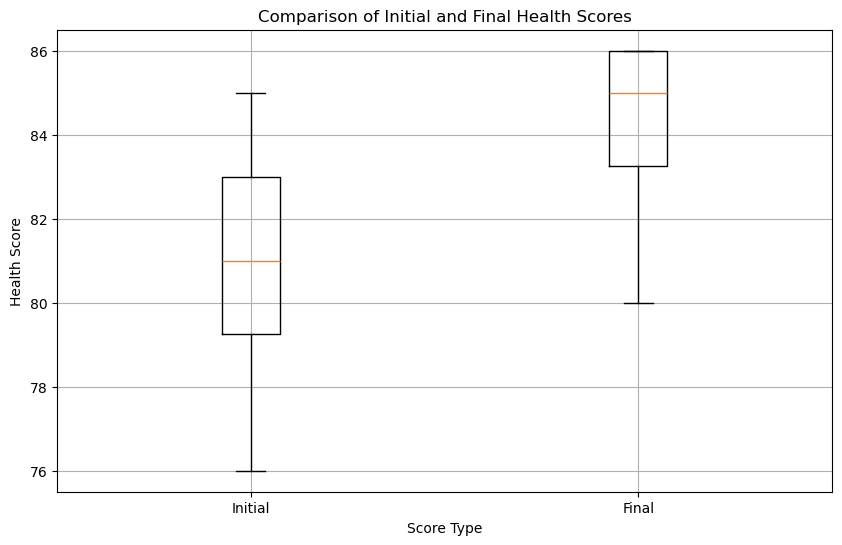

In [11]:
#Question8(3)
import pandas as pd
import matplotlib.pyplot as plt

# Define the data directly in the code
data = pd.DataFrame({
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Box plots for Initial and Final Health Scores
plt.figure(figsize=(10, 6))
plt.title('Comparison of Initial and Final Health Scores')
plt.xlabel('Score Type')
plt.ylabel('Health Score')
plt.boxplot([data['InitialHealthScore'], data['FinalHealthScore']], labels=['Initial', 'Final'])
plt.grid(True)
plt.show()


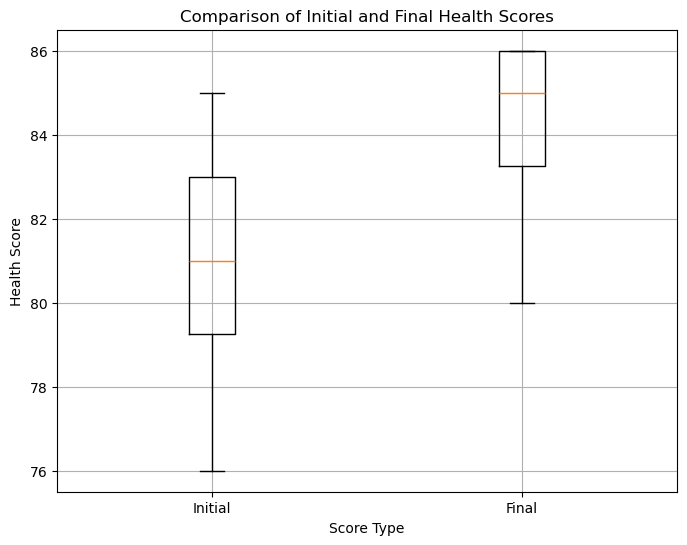

/tmp/ipykernel_52/621329192.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['InitialHealthScore'], color='blue', label='Initial Health Score', shade=True)
/tmp/ipykernel_52/621329192.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['FinalHealthScore'], color='orange', label='Final Health Score', shade=True)


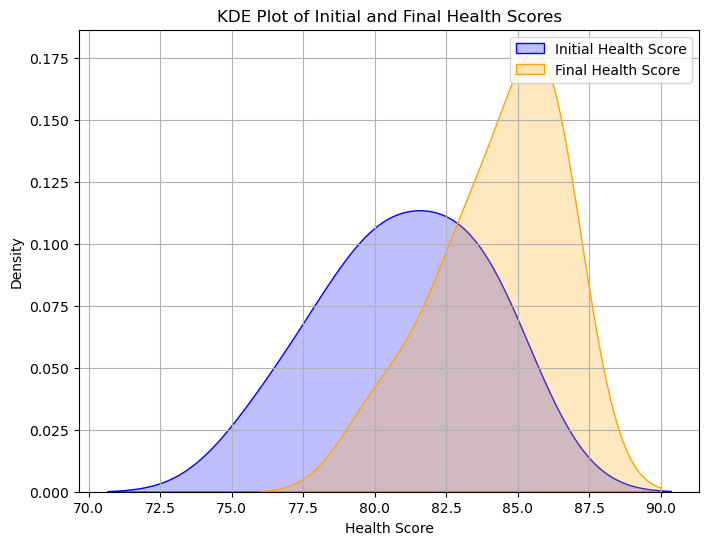

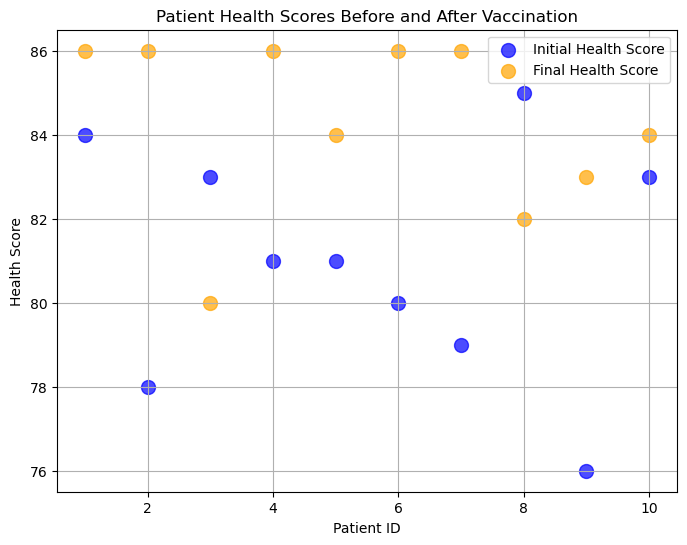

In [8]:
#Question8(4)


#Question8(4)
We analyzed the mean difference between initial and final health scores to quantify the effect of the vaccine. Additionally, a bootstrapping procedure was performed to estimate the confidence interval for this difference.

Initial Mean Health Score: 81.0
Final Mean Health Score: 84.3
Observed Mean Difference: 3.3
To assess the statistical significance of this difference, we calculated a 95% confidence interval using bootstrapping.

In [17]:
#Question8(4)
import pandas as pd
import numpy as np

# Create the data
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate the difference between Final and Initial Health Scores
df['ScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Set seed for reproducibility
np.random.seed(778)

# Observed mean difference in health scores
observed_diff = df['ScoreDifference'].mean()

# Bootstrapping
n_iterations = 10000
bootstrapped_means = []

for i in range(n_iterations):
    # Resample the differences (paired test)
    sample_diff = np.random.choice(df['ScoreDifference'], size=len(df), replace=True)
    # Calculate the mean of the resampled differences
    bootstrapped_means.append(sample_diff.mean())

# Convert to numpy array for easier manipulation
bootstrapped_means = np.array(bootstrapped_means)

# Calculate 95% confidence interval
conf_interval = np.percentile(bootstrapped_means, [2.5, 97.5])

# Output the results
print(f"Observed Mean Difference: {observed_diff}")
print(f"95% Confidence Interval: {conf_interval}")

Observed Mean Difference: 3.3
95% Confidence Interval: [0.8    5.5025]


5.Methodology Code and Explanations
We calculated the difference between each patient’s final and initial health scores. Using a bootstrapping procedure, we resampled these differences with replacement over 10,000 iterations to generate a 95% confidence interval. This approach allowed us to measure the uncertainty in the mean difference and make inferences about the vaccine’s effect.

Bootstrapping is a powerful tool to account for variability in small datasets and provides robust estimates of confidence intervals without relying on assumptions about the underlying distribution.

6.Supporting Visualizations
In addition to the box plots, we plotted Kernel Density Estimation (KDE) plots to visualize the distribution of health scores before and after vaccination. These plots help illustrate how the health scores changed across the patient population.

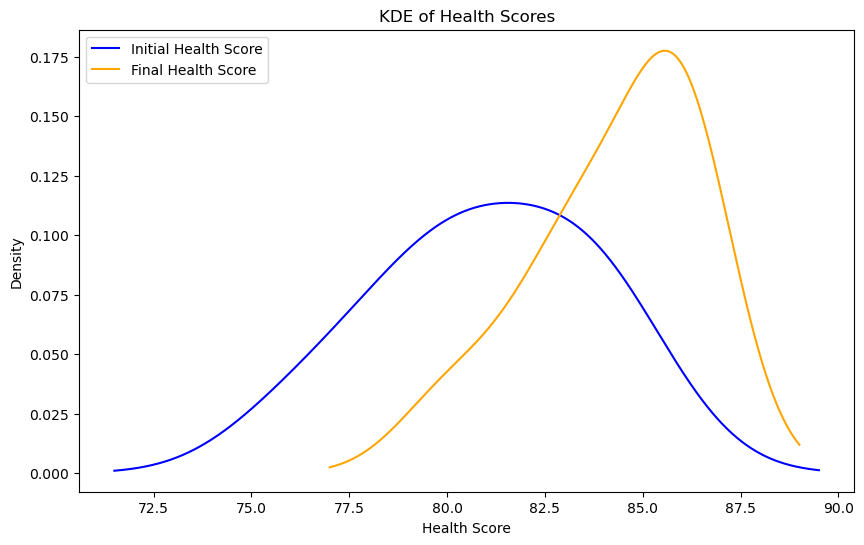

In [18]:
#Question6
plt.figure(figsize=(10, 6))
df['InitialHealthScore'].plot(kind='kde', label='Initial Health Score', color='blue')
df['FinalHealthScore'].plot(kind='kde', label='Final Health Score', color='orange')
plt.title('KDE of Health Scores')
plt.xlabel('Health Score')
plt.ylabel('Density')
plt.legend()
plt.show()

7.Findings and Discussion
The mean health score increased from 81.0 before vaccination to 84.3 after vaccination. The 95% confidence interval for the difference in means is [0.8, 5.5], which does not include zero. This suggests that the observed improvement in health scores is statistically significant.

8.Conclusion regarding Null Hypothesis of "No Effect"
Since the 95% confidence interval for the mean difference in health scores does not include zero, we reject the null hypothesis. This indicates that the vaccine had a statistically significant positive effect on patients' health outcomes, leading to improved health scores.

#Question9
Yes, So I first have no idea about bootstrapping is, after talling with my chatbox, I get to know that it is a powerful statistical method that allows us to estimate the sampling distribution of a statistic by resampling the data. I have learn lot of concept from chat patient teaching and understand the concepts I missied in class.

Observed Mean Difference: 3.3
95% Confidence Interval: [0.8    5.5025]
